In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [4]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 33)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [5]:
import numpy as np
import random

number_codes = []
for i in range(2**(10-1), 2**10-1):
    for j in bin(i).split('b')[1]:
        number_codes.append(int(j))
number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

slice = random.sample(range(511),45)

number_codes = number_codes[:,slice].tolist() 

In [6]:
classes = []
for i in range(45):
    code_list = np.array(number_codes).T[i]
    classes.append(np.where(code_list==1)[0].tolist())

In [7]:
matrix_errors = []

for i in range(9):
    for j in range(i+1,10):
        matrix_errors.append(45 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
np.min(matrix_errors)
        # print(number_codes[i], number_codes[j], 3 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
#np.mean(matrix_errors)  

15

In [8]:
winner_list = []

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:1452
number of class2:165

 ****** Running generation 0 ****** 

Population's average fitness: 0.39763 stdev: 0.25492
Best fitness: 0.89796 - size: (2, 13) - species 4 - id 127
Average adjusted fitness: 0.315
Mean genetic distance 2.844, standard deviation 0.427
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 6.141 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58280 stdev: 0.27721
Best fitness: 0.89796 - size: (3, 14) - species 3 - id 219
Average adjusted fitness: 0.466
Mean genetic distance 2.885, standard deviation 0.444
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 6.063 sec (6.102 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.71968 stdev: 0.24243
Best fitness: 0.91404 - size: (3, 16) - species 5 - id 486
Average adjusted fitness: 0.557
Mean genetic distance 2.947, standard deviation 0.470
Population of 201 members in 28 species
Total extincti

Population's average fitness: 0.68463 stdev: 0.14347
Best fitness: 0.84168 - size: (3, 15) - species 5 - id 1912
Average adjusted fitness: 0.418
Mean genetic distance 3.069, standard deviation 0.483
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 6.684 sec (6.629 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.66824 stdev: 0.15518
Best fitness: 0.84168 - size: (3, 15) - species 5 - id 1912
Average adjusted fitness: 0.372
Mean genetic distance 3.099, standard deviation 0.491
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 6.853 sec (6.676 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.67363 stdev: 0.15323
Best fitness: 0.86333 - size: (5, 18) - species 19 - id 2546
Average adjusted fitness: 0.386
Mean genetic distance 3.103, standard deviation 0.497
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 6.959 sec (6.720 average)

 ****** R

Mean genetic distance 3.072, standard deviation 0.473
Population of 200 members in 44 species
Total extinctions: 0
Generation time: 6.374 sec (5.955 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.69202 stdev: 0.17355
Best fitness: 0.85220 - size: (2, 13) - species 37 - id 188
Average adjusted fitness: 0.468
Mean genetic distance 3.067, standard deviation 0.474
Population of 200 members in 44 species
Total extinctions: 0
Generation time: 6.354 sec (6.005 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.69140 stdev: 0.18328
Best fitness: 0.85343 - size: (4, 19) - species 33 - id 1271
Average adjusted fitness: 0.470
Mean genetic distance 3.078, standard deviation 0.470
Population of 205 members in 46 species
Total extinctions: 0
Generation time: 6.368 sec (6.045 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.68614 stdev: 0.18954
Best fitness: 0.85343 - size: (4, 19) - species 33 - id 1271
Aver

Mean genetic distance 3.163, standard deviation 0.539
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 7.428 sec (7.225 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.70961 stdev: 0.18015
Best fitness: 0.86024 - size: (4, 19) - species 37 - id 2766
Average adjusted fitness: 0.520
Mean genetic distance 3.175, standard deviation 0.534
Population of 196 members in 26 species
Total extinctions: 0
Generation time: 7.709 sec (7.276 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.71764 stdev: 0.17584
Best fitness: 0.86024 - size: (4, 19) - species 37 - id 2766
Average adjusted fitness: 0.517
Mean genetic distance 3.202, standard deviation 0.544
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 7.778 sec (7.360 average)
number of class1:810
number of class2:807

 ****** Running generation 0 ****** 

Population's average fitness: 0.49952 stdev: 0.05730
Best fitness: 0.7322

Mean genetic distance 3.224, standard deviation 0.483
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 7.336 sec (7.084 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.61786 stdev: 0.09035
Best fitness: 0.77242 - size: (7, 21) - species 42 - id 2811
Average adjusted fitness: 0.206
Mean genetic distance 3.227, standard deviation 0.485
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 7.436 sec (7.149 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.62577 stdev: 0.08709
Best fitness: 0.77242 - size: (7, 21) - species 42 - id 2811
Average adjusted fitness: 0.185
Mean genetic distance 3.221, standard deviation 0.477
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 7.653 sec (7.240 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.62002 stdev: 0.09288
Best fitness: 0.77242 - size: (7, 21) - species 42 - id 2811


Mean genetic distance 3.153, standard deviation 0.483
Population of 191 members in 37 species
Total extinctions: 0
Generation time: 6.965 sec (6.672 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.61585 stdev: 0.08904
Best fitness: 0.74335 - size: (6, 22) - species 28 - id 969
Average adjusted fitness: 0.263
Mean genetic distance 3.162, standard deviation 0.488
Population of 194 members in 37 species
Total extinctions: 0
Generation time: 6.823 sec (6.750 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62960 stdev: 0.08186
Best fitness: 0.74335 - size: (6, 22) - species 28 - id 969
Average adjusted fitness: 0.230
Mean genetic distance 3.193, standard deviation 0.484
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 6.999 sec (6.820 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.62674 stdev: 0.08888
Best fitness: 0.74335 - size: (6, 22) - species 28 - id 969
Ave


Population's average fitness: 0.58510 stdev: 0.08819
Best fitness: 0.76067 - size: (2, 14) - species 17 - id 334
Average adjusted fitness: 0.239
Mean genetic distance 3.049, standard deviation 0.495
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 6.001 sec (5.708 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58954 stdev: 0.08893
Best fitness: 0.76067 - size: (2, 14) - species 17 - id 334
Average adjusted fitness: 0.218
Mean genetic distance 3.084, standard deviation 0.491
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 6.366 sec (5.818 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.60171 stdev: 0.08332
Best fitness: 0.76067 - size: (2, 14) - species 17 - id 334
Average adjusted fitness: 0.215
Mean genetic distance 3.119, standard deviation 0.491
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 6.405 sec (5.902 average)

 ****** Run

Generation time: 7.999 sec (7.783 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.62275 stdev: 0.08540
Best fitness: 0.77675 - size: (3, 18) - species 3 - id 1605
Average adjusted fitness: 0.276
Mean genetic distance 3.138, standard deviation 0.557
Population of 192 members in 21 species
Total extinctions: 0
Generation time: 8.376 sec (7.878 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.62242 stdev: 0.08710
Best fitness: 0.77675 - size: (3, 18) - species 3 - id 1605
Average adjusted fitness: 0.263
Mean genetic distance 3.137, standard deviation 0.573
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 7.860 sec (7.917 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.62726 stdev: 0.08578
Best fitness: 0.77675 - size: (3, 18) - species 3 - id 1605
Average adjusted fitness: 0.257
Mean genetic distance 3.134, standard deviation 0.580
Population of 195 members in 21 

Population of 191 members in 35 species
Total extinctions: 0
Generation time: 6.818 sec (6.975 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.65292 stdev: 0.10516
Best fitness: 0.82189 - size: (4, 18) - species 35 - id 2151
Average adjusted fitness: 0.360
Mean genetic distance 3.191, standard deviation 0.461
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 6.911 sec (7.002 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.65915 stdev: 0.09437
Best fitness: 0.82560 - size: (5, 21) - species 35 - id 2884
Average adjusted fitness: 0.273
Mean genetic distance 3.207, standard deviation 0.453
Population of 193 members in 33 species
Total extinctions: 0
Generation time: 7.281 sec (7.064 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.65883 stdev: 0.09854
Best fitness: 0.82560 - size: (5, 21) - species 35 - id 2884
Average adjusted fitness: 0.279
Mean genetic distance 

Mean genetic distance 3.140, standard deviation 0.469
Population of 199 members in 46 species
Total extinctions: 0
Generation time: 6.768 sec (6.283 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.61986 stdev: 0.10313
Best fitness: 0.87137 - size: (4, 16) - species 40 - id 904
Average adjusted fitness: 0.276
Mean genetic distance 3.136, standard deviation 0.460
Population of 204 members in 47 species
Total extinctions: 0
Generation time: 6.622 sec (6.391 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.62345 stdev: 0.10322
Best fitness: 0.87137 - size: (4, 16) - species 40 - id 904
Average adjusted fitness: 0.282
Mean genetic distance 3.136, standard deviation 0.455
Population of 196 members in 48 species
Total extinctions: 0
Generation time: 6.911 sec (6.500 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.61815 stdev: 0.11558
Best fitness: 0.87137 - size: (4, 16) - species 40 - id 904
Ave

Population's average fitness: 0.60217 stdev: 0.13708
Best fitness: 0.82127 - size: (2, 13) - species 23 - id 96
Average adjusted fitness: 0.301
Mean genetic distance 3.120, standard deviation 0.480
Population of 204 members in 31 species
Total extinctions: 0
Generation time: 5.913 sec (5.590 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.60627 stdev: 0.14443
Best fitness: 0.82127 - size: (2, 13) - species 23 - id 96
Average adjusted fitness: 0.304
Mean genetic distance 3.087, standard deviation 0.478
Population of 205 members in 32 species
Total extinctions: 0
Generation time: 6.202 sec (5.743 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.61050 stdev: 0.14294
Best fitness: 0.82498 - size: (2, 12) - species 23 - id 835
Average adjusted fitness: 0.328
Mean genetic distance 3.115, standard deviation 0.482
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 6.417 sec (5.878 average)

 ****** Runnin

Population's average fitness: 0.67085 stdev: 0.13881
Best fitness: 0.83055 - size: (3, 14) - species 23 - id 1108
Average adjusted fitness: 0.412
Mean genetic distance 3.183, standard deviation 0.517
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 7.686 sec (7.485 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.65160 stdev: 0.15627
Best fitness: 0.83055 - size: (3, 14) - species 23 - id 1108
Average adjusted fitness: 0.398
Mean genetic distance 3.192, standard deviation 0.527
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 7.853 sec (7.531 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.66339 stdev: 0.14221
Best fitness: 0.83055 - size: (3, 14) - species 23 - id 1108
Average adjusted fitness: 0.379
Mean genetic distance 3.204, standard deviation 0.534
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 7.811 sec (7.586 average)

 ******

Population of 198 members in 30 species
Total extinctions: 0
Generation time: 6.677 sec (6.678 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.61133 stdev: 0.09985
Best fitness: 0.77675 - size: (5, 19) - species 2 - id 1917
Average adjusted fitness: 0.256
Mean genetic distance 3.172, standard deviation 0.506
Population of 196 members in 30 species
Total extinctions: 0
Generation time: 6.895 sec (6.715 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.61802 stdev: 0.09454
Best fitness: 0.77675 - size: (5, 19) - species 2 - id 1917
Average adjusted fitness: 0.223
Mean genetic distance 3.184, standard deviation 0.502
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 6.875 sec (6.760 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.61565 stdev: 0.09432
Best fitness: 0.77675 - size: (5, 19) - species 2 - id 1917
Average adjusted fitness: 0.251
Mean genetic distance 3.1

Mean genetic distance 3.089, standard deviation 0.473
Population of 196 members in 44 species
Total extinctions: 0
Generation time: 7.035 sec (6.244 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.58947 stdev: 0.08592
Best fitness: 0.81323 - size: (6, 21) - species 37 - id 1054
Average adjusted fitness: 0.219
Mean genetic distance 3.083, standard deviation 0.466
Population of 202 members in 44 species
Total extinctions: 0
Generation time: 7.855 sec (6.405 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.58951 stdev: 0.08664
Best fitness: 0.81323 - size: (6, 21) - species 37 - id 1054
Average adjusted fitness: 0.218
Mean genetic distance 3.113, standard deviation 0.465
Population of 202 members in 44 species
Total extinctions: 0
Generation time: 11.898 sec (7.076 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.59305 stdev: 0.08560
Best fitness: 0.81323 - size: (6, 21) - species 37 - id 1054


Mean genetic distance 3.262, standard deviation 0.519
Population of 195 members in 30 species
Total extinctions: 0
Generation time: 10.848 sec (8.690 average)
number of class1:808
number of class2:809

 ****** Running generation 0 ****** 

Population's average fitness: 0.49094 stdev: 0.06465
Best fitness: 0.71490 - size: (2, 13) - species 4 - id 52
Average adjusted fitness: 0.180
Mean genetic distance 2.941, standard deviation 0.501
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 6.804 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53246 stdev: 0.06305
Best fitness: 0.71490 - size: (2, 13) - species 1 - id 52
Average adjusted fitness: 0.193
Mean genetic distance 3.069, standard deviation 0.516
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 6.573 sec (6.688 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54269 stdev: 0.06421
Best fitness: 0.72480 - size: (3, 14) - spe

Population of 196 members in 31 species
Total extinctions: 0
Generation time: 9.232 sec (8.698 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.61386 stdev: 0.09073
Best fitness: 0.77798 - size: (7, 21) - species 34 - id 3219
Average adjusted fitness: 0.249
Mean genetic distance 3.204, standard deviation 0.494
Population of 196 members in 28 species
Total extinctions: 0
Generation time: 7.620 sec (8.371 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.61592 stdev: 0.08667
Best fitness: 0.77798 - size: (7, 21) - species 34 - id 3219
Average adjusted fitness: 0.213
Mean genetic distance 3.233, standard deviation 0.519
Population of 197 members in 28 species
Total extinctions: 0
Generation time: 8.431 sec (8.326 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.61385 stdev: 0.08837
Best fitness: 0.77798 - size: (7, 21) - species 34 - id 3219
Average adjusted fitness: 0.232
Mean genetic distance 

Mean genetic distance 3.126, standard deviation 0.516
Population of 206 members in 35 species
Total extinctions: 0
Generation time: 7.357 sec (6.852 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.69781 stdev: 0.18170
Best fitness: 0.87013 - size: (9, 28) - species 17 - id 2335
Average adjusted fitness: 0.492
Mean genetic distance 3.112, standard deviation 0.534
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 7.951 sec (6.981 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.69646 stdev: 0.19102
Best fitness: 0.87013 - size: (9, 28) - species 17 - id 2335
Average adjusted fitness: 0.511
Mean genetic distance 3.157, standard deviation 0.532
Population of 191 members in 31 species
Total extinctions: 0
Generation time: 7.969 sec (7.130 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.67379 stdev: 0.20445
Best fitness: 0.87013 - size: (9, 28) - species 17 - id 2335


Mean genetic distance 3.162, standard deviation 0.478
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 6.666 sec (6.103 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.64630 stdev: 0.13448
Best fitness: 0.82437 - size: (3, 16) - species 5 - id 936
Average adjusted fitness: 0.386
Mean genetic distance 3.143, standard deviation 0.469
Population of 199 members in 41 species
Total extinctions: 0
Generation time: 6.817 sec (6.205 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.66088 stdev: 0.12518
Best fitness: 0.84416 - size: (4, 17) - species 10 - id 1211
Average adjusted fitness: 0.393
Mean genetic distance 3.144, standard deviation 0.481
Population of 195 members in 41 species
Total extinctions: 0
Generation time: 6.969 sec (6.300 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.67093 stdev: 0.12510
Best fitness: 0.84601 - size: (4, 14) - species 33 - id 1352
Avera

Mean genetic distance 3.187, standard deviation 0.506
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 8.214 sec (7.677 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.69690 stdev: 0.13765
Best fitness: 0.86456 - size: (7, 25) - species 32 - id 3620
Average adjusted fitness: 0.449
Mean genetic distance 3.185, standard deviation 0.517
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 9.780 sec (7.927 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.69327 stdev: 0.13865
Best fitness: 0.86456 - size: (7, 25) - species 32 - id 3620
Average adjusted fitness: 0.383
Mean genetic distance 3.209, standard deviation 0.510
Population of 194 members in 33 species
Total extinctions: 0
Generation time: 7.885 sec (7.965 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.67917 stdev: 0.15726
Best fitness: 0.86456 - size: (7, 25) - species 32 - id 3620


Mean genetic distance 3.280, standard deviation 0.506
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 7.191 sec (7.224 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.60850 stdev: 0.08987
Best fitness: 0.76933 - size: (3, 17) - species 32 - id 1481
Average adjusted fitness: 0.202
Mean genetic distance 3.287, standard deviation 0.506
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 7.335 sec (7.190 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.61675 stdev: 0.08808
Best fitness: 0.76933 - size: (3, 17) - species 32 - id 1481
Average adjusted fitness: 0.234
Mean genetic distance 3.312, standard deviation 0.513
Population of 192 members in 37 species
Total extinctions: 0
Generation time: 7.502 sec (7.204 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.61826 stdev: 0.08952
Best fitness: 0.76933 - size: (3, 17) - species 32 - id 1481


Mean genetic distance 3.178, standard deviation 0.506
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 7.343 sec (6.788 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.58927 stdev: 0.07272
Best fitness: 0.74026 - size: (5, 19) - species 4 - id 830
Average adjusted fitness: 0.207
Mean genetic distance 3.193, standard deviation 0.504
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 6.903 sec (6.852 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.58690 stdev: 0.07767
Best fitness: 0.74026 - size: (5, 19) - species 4 - id 830
Average adjusted fitness: 0.204
Mean genetic distance 3.164, standard deviation 0.501
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 7.057 sec (6.915 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.59248 stdev: 0.07818
Best fitness: 0.74583 - size: (6, 22) - species 6 - id 2126
Avera

Total extinctions: 0
Generation time: 5.927 sec (5.633 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.58787 stdev: 0.08725
Best fitness: 0.74088 - size: (3, 14) - species 25 - id 464
Average adjusted fitness: 0.217
Mean genetic distance 3.039, standard deviation 0.471
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 6.450 sec (5.837 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59161 stdev: 0.08995
Best fitness: 0.77304 - size: (3, 14) - species 29 - id 812
Average adjusted fitness: 0.290
Mean genetic distance 3.055, standard deviation 0.469
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 6.457 sec (5.961 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58997 stdev: 0.09783
Best fitness: 0.77304 - size: (3, 14) - species 29 - id 812
Average adjusted fitness: 0.257
Mean genetic distance 3.085, standard deviation 0.456
Population of 

Population's average fitness: 0.63507 stdev: 0.09807
Best fitness: 0.81014 - size: (10, 24) - species 10 - id 3748
Average adjusted fitness: 0.286
Mean genetic distance 3.280, standard deviation 0.484
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 7.854 sec (7.671 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.63241 stdev: 0.09210
Best fitness: 0.81014 - size: (10, 24) - species 10 - id 3748
Average adjusted fitness: 0.298
Mean genetic distance 3.308, standard deviation 0.486
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 9.098 sec (7.860 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.64054 stdev: 0.08567
Best fitness: 0.81014 - size: (10, 24) - species 10 - id 3748
Average adjusted fitness: 0.259
Mean genetic distance 3.312, standard deviation 0.494
Population of 195 members in 32 species
Total extinctions: 0
Generation time: 8.874 sec (8.018 average)

 ***

Population's average fitness: 0.65522 stdev: 0.11706
Best fitness: 0.81323 - size: (4, 17) - species 1 - id 1077
Average adjusted fitness: 0.367
Mean genetic distance 3.248, standard deviation 0.505
Population of 196 members in 36 species
Total extinctions: 0
Generation time: 7.985 sec (7.873 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.65109 stdev: 0.12701
Best fitness: 0.81323 - size: (4, 17) - species 1 - id 1077
Average adjusted fitness: 0.377
Mean genetic distance 3.256, standard deviation 0.505
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 8.621 sec (8.034 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.64150 stdev: 0.12717
Best fitness: 0.81323 - size: (4, 17) - species 1 - id 1077
Average adjusted fitness: 0.341
Mean genetic distance 3.252, standard deviation 0.503
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 8.660 sec (8.180 average)

 ****** Ru

Population's average fitness: 0.63860 stdev: 0.13476
Best fitness: 0.81942 - size: (5, 20) - species 5 - id 1542
Average adjusted fitness: 0.333
Mean genetic distance 3.087, standard deviation 0.484
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 7.488 sec (6.896 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.63833 stdev: 0.13978
Best fitness: 0.82251 - size: (6, 21) - species 5 - id 1676
Average adjusted fitness: 0.379
Mean genetic distance 3.067, standard deviation 0.494
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 7.533 sec (7.059 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.64807 stdev: 0.13621
Best fitness: 0.83488 - size: (6, 22) - species 5 - id 1804
Average adjusted fitness: 0.349
Mean genetic distance 3.073, standard deviation 0.502
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 7.328 sec (7.150 average)

 ****** Ru

number of class2:485

 ****** Running generation 0 ****** 

Population's average fitness: 0.45084 stdev: 0.15149
Best fitness: 0.74830 - size: (2, 13) - species 7 - id 95
Average adjusted fitness: 0.176
Mean genetic distance 2.933, standard deviation 0.475
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 5.504 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58658 stdev: 0.14196
Best fitness: 0.75077 - size: (3, 14) - species 24 - id 378
Average adjusted fitness: 0.344
Mean genetic distance 2.994, standard deviation 0.506
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 5.669 sec (5.586 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59976 stdev: 0.14441
Best fitness: 0.75077 - size: (3, 14) - species 24 - id 378
Average adjusted fitness: 0.321
Mean genetic distance 3.033, standard deviation 0.492
Population of 200 members in 30 species
Total extinctions: 0
Generation tim

Population's average fitness: 0.57984 stdev: 0.07796
Best fitness: 0.70315 - size: (5, 17) - species 2 - id 1834
Average adjusted fitness: 0.210
Mean genetic distance 3.063, standard deviation 0.469
Population of 198 members in 42 species
Total extinctions: 0
Generation time: 7.187 sec (6.686 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.58744 stdev: 0.07524
Best fitness: 0.70315 - size: (5, 17) - species 2 - id 1834
Average adjusted fitness: 0.210
Mean genetic distance 3.070, standard deviation 0.469
Population of 193 members in 41 species
Total extinctions: 0
Generation time: 6.269 sec (6.705 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.58592 stdev: 0.07555
Best fitness: 0.70315 - size: (5, 17) - species 2 - id 1834
Average adjusted fitness: 0.183
Mean genetic distance 3.114, standard deviation 0.474
Population of 190 members in 39 species
Total extinctions: 0
Generation time: 6.167 sec (6.735 average)

 ****** Ru

Population's average fitness: 0.63896 stdev: 0.11146
Best fitness: 0.81571 - size: (3, 16) - species 15 - id 687
Average adjusted fitness: 0.321
Mean genetic distance 3.104, standard deviation 0.487
Population of 191 members in 35 species
Total extinctions: 0
Generation time: 6.096 sec (5.936 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.63811 stdev: 0.12357
Best fitness: 0.81571 - size: (3, 16) - species 15 - id 687
Average adjusted fitness: 0.326
Mean genetic distance 3.102, standard deviation 0.505
Population of 193 members in 36 species
Total extinctions: 0
Generation time: 5.881 sec (5.929 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.64882 stdev: 0.11676
Best fitness: 0.81571 - size: (3, 16) - species 15 - id 687
Average adjusted fitness: 0.264
Mean genetic distance 3.102, standard deviation 0.490
Population of 191 members in 36 species
Total extinctions: 0
Generation time: 5.954 sec (5.932 average)

 ****** Runn

Population's average fitness: 0.68849 stdev: 0.12110
Best fitness: 0.83859 - size: (4, 18) - species 26 - id 3000
Average adjusted fitness: 0.308
Mean genetic distance 3.227, standard deviation 0.498
Population of 193 members in 27 species
Total extinctions: 0
Generation time: 8.694 sec (7.720 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.67633 stdev: 0.12626
Best fitness: 0.83859 - size: (4, 18) - species 26 - id 3000
Average adjusted fitness: 0.305
Mean genetic distance 3.238, standard deviation 0.505
Population of 194 members in 27 species
Total extinctions: 0
Generation time: 6.949 sec (7.701 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.67980 stdev: 0.11394
Best fitness: 0.83859 - size: (4, 18) - species 26 - id 3000
Average adjusted fitness: 0.268
Mean genetic distance 3.216, standard deviation 0.510
Population of 195 members in 25 species
Total extinctions: 0
Generation time: 7.029 sec (7.519 average)
number o

Population's average fitness: 0.63806 stdev: 0.09106
Best fitness: 0.77860 - size: (4, 17) - species 39 - id 2646
Average adjusted fitness: 0.252
Mean genetic distance 3.144, standard deviation 0.520
Population of 195 members in 28 species
Total extinctions: 0
Generation time: 6.482 sec (6.825 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.63053 stdev: 0.10410
Best fitness: 0.77860 - size: (4, 17) - species 39 - id 2646
Average adjusted fitness: 0.274
Mean genetic distance 3.182, standard deviation 0.526
Population of 193 members in 26 species
Total extinctions: 0
Generation time: 6.919 sec (6.897 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.63089 stdev: 0.09761
Best fitness: 0.77860 - size: (4, 17) - species 39 - id 2646
Average adjusted fitness: 0.286
Mean genetic distance 3.190, standard deviation 0.525
Population of 197 members in 26 species
Total extinctions: 0
Generation time: 6.415 sec (6.889 average)

 ******

Population's average fitness: 0.68018 stdev: 0.12632
Best fitness: 0.83426 - size: (6, 20) - species 13 - id 1392
Average adjusted fitness: 0.462
Mean genetic distance 3.183, standard deviation 0.464
Population of 201 members in 45 species
Total extinctions: 0
Generation time: 6.873 sec (6.592 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.67948 stdev: 0.13259
Best fitness: 0.83426 - size: (6, 20) - species 13 - id 1392
Average adjusted fitness: 0.462
Mean genetic distance 3.173, standard deviation 0.467
Population of 202 members in 45 species
Total extinctions: 0
Generation time: 6.331 sec (6.633 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.69717 stdev: 0.11691
Best fitness: 0.83921 - size: (7, 22) - species 27 - id 1967
Average adjusted fitness: 0.479
Mean genetic distance 3.201, standard deviation 0.458
Population of 200 members in 47 species
Total extinctions: 0
Generation time: 6.821 sec (6.720 average)

 ******

Population's average fitness: 0.57146 stdev: 0.10826
Best fitness: 0.79530 - size: (3, 15) - species 2 - id 688
Average adjusted fitness: 0.279
Mean genetic distance 3.129, standard deviation 0.513
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 6.075 sec (5.893 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58315 stdev: 0.10951
Best fitness: 0.79530 - size: (3, 15) - species 2 - id 688
Average adjusted fitness: 0.380
Mean genetic distance 3.174, standard deviation 0.499
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 5.753 sec (5.865 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59054 stdev: 0.10608
Best fitness: 0.80705 - size: (4, 15) - species 33 - id 956
Average adjusted fitness: 0.254
Mean genetic distance 3.163, standard deviation 0.483
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 6.059 sec (5.897 average)

 ****** Runnin

Population's average fitness: 0.63674 stdev: 0.12570
Best fitness: 0.86085 - size: (5, 18) - species 37 - id 2436
Average adjusted fitness: 0.294
Mean genetic distance 3.263, standard deviation 0.499
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 7.829 sec (7.923 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.63574 stdev: 0.13187
Best fitness: 0.86085 - size: (5, 18) - species 37 - id 2436
Average adjusted fitness: 0.322
Mean genetic distance 3.261, standard deviation 0.504
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 7.164 sec (7.901 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.63360 stdev: 0.12769
Best fitness: 0.86085 - size: (5, 18) - species 37 - id 2436
Average adjusted fitness: 0.278
Mean genetic distance 3.247, standard deviation 0.530
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 6.933 sec (7.886 average)

 ******

Generation time: 6.421 sec (6.257 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.65386 stdev: 0.11028
Best fitness: 0.81385 - size: (2, 14) - species 38 - id 1831
Average adjusted fitness: 0.333
Mean genetic distance 3.272, standard deviation 0.501
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 6.296 sec (6.256 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.65230 stdev: 0.11304
Best fitness: 0.81385 - size: (2, 14) - species 38 - id 1831
Average adjusted fitness: 0.353
Mean genetic distance 3.280, standard deviation 0.519
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 6.358 sec (6.257 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.64144 stdev: 0.11405
Best fitness: 0.81385 - size: (2, 14) - species 38 - id 1831
Average adjusted fitness: 0.305
Mean genetic distance 3.295, standard deviation 0.526
Population of 196 members in 

Population's average fitness: 0.53220 stdev: 0.09100
Best fitness: 0.74335 - size: (2, 13) - species 5 - id 271
Average adjusted fitness: 0.215
Mean genetic distance 2.881, standard deviation 0.422
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 5.267 sec (5.065 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55859 stdev: 0.09084
Best fitness: 0.74335 - size: (2, 13) - species 1 - id 271
Average adjusted fitness: 0.212
Mean genetic distance 2.857, standard deviation 0.443
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 5.351 sec (5.160 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56532 stdev: 0.09136
Best fitness: 0.74335 - size: (2, 13) - species 1 - id 271
Average adjusted fitness: 0.254
Mean genetic distance 2.862, standard deviation 0.441
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 5.499 sec (5.245 average)

 ****** Running

Population of 197 members in 32 species
Total extinctions: 0
Generation time: 8.478 sec (6.796 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.63289 stdev: 0.09238
Best fitness: 0.76314 - size: (4, 17) - species 14 - id 3336
Average adjusted fitness: 0.243
Mean genetic distance 3.253, standard deviation 0.500
Population of 197 members in 33 species
Total extinctions: 0
Generation time: 7.055 sec (6.855 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.62776 stdev: 0.09459
Best fitness: 0.77427 - size: (7, 24) - species 21 - id 3667
Average adjusted fitness: 0.228
Mean genetic distance 3.241, standard deviation 0.502
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 7.472 sec (6.970 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.62658 stdev: 0.09791
Best fitness: 0.77427 - size: (7, 24) - species 21 - id 3667
Average adjusted fitness: 0.236
Mean genetic distance 

Population of 194 members in 41 species
Total extinctions: 0
Generation time: 6.378 sec (6.111 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.60121 stdev: 0.08549
Best fitness: 0.79592 - size: (7, 26) - species 40 - id 2368
Average adjusted fitness: 0.194
Mean genetic distance 3.136, standard deviation 0.485
Population of 190 members in 35 species
Total extinctions: 0
Generation time: 6.131 sec (6.131 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.60575 stdev: 0.08155
Best fitness: 0.79592 - size: (7, 26) - species 40 - id 2368
Average adjusted fitness: 0.199
Mean genetic distance 3.122, standard deviation 0.500
Population of 192 members in 32 species
Total extinctions: 0
Generation time: 6.308 sec (6.173 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.60240 stdev: 0.07937
Best fitness: 0.79592 - size: (7, 26) - species 40 - id 2368
Average adjusted fitness: 0.138
Mean genetic distance 

Mean genetic distance 3.126, standard deviation 0.490
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 6.733 sec (6.004 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.56916 stdev: 0.06694
Best fitness: 0.71058 - size: (5, 18) - species 27 - id 1078
Average adjusted fitness: 0.161
Mean genetic distance 3.124, standard deviation 0.502
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 6.901 sec (6.103 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.58105 stdev: 0.07081
Best fitness: 0.71058 - size: (5, 18) - species 27 - id 1078
Average adjusted fitness: 0.205
Mean genetic distance 3.105, standard deviation 0.499
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 6.321 sec (6.125 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.58141 stdev: 0.06577
Best fitness: 0.71058 - size: (5, 18) - species 27 - id 1078
Av

Mean genetic distance 3.228, standard deviation 0.521
Population of 198 members in 26 species
Total extinctions: 0
Generation time: 7.386 sec (7.397 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.59652 stdev: 0.07379
Best fitness: 0.74768 - size: (7, 23) - species 15 - id 4206
Average adjusted fitness: 0.186
Mean genetic distance 3.225, standard deviation 0.524
Population of 196 members in 26 species
Total extinctions: 0
Generation time: 8.096 sec (7.455 average)
number of class1:972
number of class2:645

 ****** Running generation 0 ****** 

Population's average fitness: 0.47364 stdev: 0.09376
Best fitness: 0.72418 - size: (2, 13) - species 4 - id 109
Average adjusted fitness: 0.174
Mean genetic distance 2.976, standard deviation 0.503
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 6.402 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52564 stdev: 0.09891
Best fitness: 0.74583 - size: (2, 13) -

Total extinctions: 0
Generation time: 6.767 sec (7.163 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.63026 stdev: 0.10310
Best fitness: 0.80087 - size: (5, 21) - species 24 - id 2865
Average adjusted fitness: 0.242
Mean genetic distance 3.194, standard deviation 0.489
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 6.875 sec (7.005 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.63638 stdev: 0.10274
Best fitness: 0.80087 - size: (5, 21) - species 24 - id 2865
Average adjusted fitness: 0.271
Mean genetic distance 3.191, standard deviation 0.499
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 7.207 sec (6.858 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.64009 stdev: 0.10146
Best fitness: 0.80087 - size: (5, 21) - species 24 - id 2865
Average adjusted fitness: 0.253
Mean genetic distance 3.197, standard deviation 0.501
Populati

Population's average fitness: 0.58042 stdev: 0.10137
Best fitness: 0.76933 - size: (3, 15) - species 19 - id 476
Average adjusted fitness: 0.318
Mean genetic distance 3.037, standard deviation 0.494
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 5.705 sec (5.419 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.59475 stdev: 0.09719
Best fitness: 0.76933 - size: (3, 15) - species 19 - id 476
Average adjusted fitness: 0.258
Mean genetic distance 3.039, standard deviation 0.489
Population of 205 members in 29 species
Total extinctions: 0
Generation time: 6.044 sec (5.508 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59839 stdev: 0.10185
Best fitness: 0.79344 - size: (4, 16) - species 9 - id 1278
Average adjusted fitness: 0.316
Mean genetic distance 3.035, standard deviation 0.496
Population of 205 members in 29 species
Total extinctions: 0
Generation time: 6.163 sec (5.590 average)

 ****** Runn

Mean genetic distance 3.233, standard deviation 0.489
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 7.241 sec (7.143 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.65350 stdev: 0.10637
Best fitness: 0.82189 - size: (4, 15) - species 19 - id 4209
Average adjusted fitness: 0.318
Mean genetic distance 3.208, standard deviation 0.496
Population of 194 members in 30 species
Total extinctions: 0
Generation time: 7.423 sec (7.237 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.66292 stdev: 0.10172
Best fitness: 0.82189 - size: (4, 15) - species 19 - id 4209
Average adjusted fitness: 0.275
Mean genetic distance 3.205, standard deviation 0.486
Population of 195 members in 30 species
Total extinctions: 0
Generation time: 7.326 sec (7.287 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.65502 stdev: 0.10308
Best fitness: 0.82189 - size: (4, 15) - species 19 - id 4209


Mean genetic distance 3.184, standard deviation 0.536
Population of 191 members in 25 species
Total extinctions: 0
Generation time: 6.841 sec (6.606 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.65023 stdev: 0.09588
Best fitness: 0.79468 - size: (5, 20) - species 13 - id 3157
Average adjusted fitness: 0.250
Mean genetic distance 3.178, standard deviation 0.525
Population of 194 members in 25 species
Total extinctions: 0
Generation time: 6.823 sec (6.670 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.64376 stdev: 0.11036
Best fitness: 0.79777 - size: (6, 21) - species 13 - id 3310
Average adjusted fitness: 0.315
Mean genetic distance 3.241, standard deviation 0.516
Population of 195 members in 25 species
Total extinctions: 0
Generation time: 6.995 sec (6.719 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.65194 stdev: 0.09793
Best fitness: 0.79777 - size: (6, 21) - species 13 - id 3310


Population of 202 members in 37 species
Total extinctions: 0
Generation time: 6.352 sec (5.996 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.62346 stdev: 0.08860
Best fitness: 0.78355 - size: (5, 17) - species 7 - id 1841
Average adjusted fitness: 0.261
Mean genetic distance 3.211, standard deviation 0.504
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 6.665 sec (6.125 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62778 stdev: 0.08346
Best fitness: 0.78355 - size: (5, 17) - species 7 - id 1841
Average adjusted fitness: 0.250
Mean genetic distance 3.216, standard deviation 0.503
Population of 194 members in 39 species
Total extinctions: 0
Generation time: 6.794 sec (6.253 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62705 stdev: 0.09493
Best fitness: 0.78355 - size: (5, 17) - species 7 - id 1841
Average adjusted fitness: 0.328
Mean genetic distance 3.1


 ****** Running generation 3 ****** 

Population's average fitness: 0.58110 stdev: 0.09878
Best fitness: 0.77489 - size: (5, 17) - species 4 - id 684
Average adjusted fitness: 0.188
Mean genetic distance 3.092, standard deviation 0.503
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 6.326 sec (5.796 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58466 stdev: 0.09868
Best fitness: 0.78046 - size: (3, 15) - species 5 - id 808
Average adjusted fitness: 0.232
Mean genetic distance 3.118, standard deviation 0.484
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 6.608 sec (5.959 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59039 stdev: 0.10325
Best fitness: 0.78046 - size: (3, 15) - species 5 - id 808
Average adjusted fitness: 0.224
Mean genetic distance 3.130, standard deviation 0.458
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 6.4


 ****** Running generation 27 ****** 

Population's average fitness: 0.64829 stdev: 0.10974
Best fitness: 0.83364 - size: (7, 23) - species 22 - id 3354
Average adjusted fitness: 0.256
Mean genetic distance 3.145, standard deviation 0.548
Population of 197 members in 24 species
Total extinctions: 0
Generation time: 7.109 sec (6.999 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.63772 stdev: 0.12167
Best fitness: 0.83364 - size: (7, 23) - species 22 - id 3354
Average adjusted fitness: 0.348
Mean genetic distance 3.170, standard deviation 0.536
Population of 192 members in 25 species
Total extinctions: 0
Generation time: 7.362 sec (7.072 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.64789 stdev: 0.11646
Best fitness: 0.83364 - size: (7, 23) - species 22 - id 3354
Average adjusted fitness: 0.247
Mean genetic distance 3.178, standard deviation 0.555
Population of 203 members in 25 species
Total extinctions: 0
Generation 

Population's average fitness: 0.62244 stdev: 0.11072
Best fitness: 0.80891 - size: (4, 16) - species 20 - id 2576
Average adjusted fitness: 0.370
Mean genetic distance 3.209, standard deviation 0.506
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 7.384 sec (7.490 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.63966 stdev: 0.10060
Best fitness: 0.82560 - size: (5, 24) - species 12 - id 2720
Average adjusted fitness: 0.324
Mean genetic distance 3.234, standard deviation 0.501
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 7.092 sec (7.439 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.63126 stdev: 0.10335
Best fitness: 0.82560 - size: (5, 24) - species 12 - id 2720
Average adjusted fitness: 0.246
Mean genetic distance 3.248, standard deviation 0.501
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 7.623 sec (7.505 average)

 ******

Population's average fitness: 0.67623 stdev: 0.14019
Best fitness: 0.85158 - size: (3, 15) - species 15 - id 750
Average adjusted fitness: 0.408
Mean genetic distance 3.197, standard deviation 0.475
Population of 205 members in 41 species
Total extinctions: 0
Generation time: 6.569 sec (6.239 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.66500 stdev: 0.14613
Best fitness: 0.85158 - size: (3, 15) - species 15 - id 750
Average adjusted fitness: 0.358
Mean genetic distance 3.174, standard deviation 0.467
Population of 203 members in 41 species
Total extinctions: 0
Generation time: 6.948 sec (6.414 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.67388 stdev: 0.14489
Best fitness: 0.85158 - size: (3, 15) - species 15 - id 750
Average adjusted fitness: 0.434
Mean genetic distance 3.196, standard deviation 0.468
Population of 198 members in 41 species
Total extinctions: 0
Generation time: 7.178 sec (6.561 average)

 ****** Ru

Population's average fitness: 0.55691 stdev: 0.21657
Best fitness: 0.85158 - size: (2, 13) - species 3 - id 95
Average adjusted fitness: 0.393
Mean genetic distance 2.808, standard deviation 0.436
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 5.500 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.68575 stdev: 0.18251
Best fitness: 0.85158 - size: (2, 13) - species 1 - id 309
Average adjusted fitness: 0.481
Mean genetic distance 2.919, standard deviation 0.472
Population of 198 members in 24 species
Total extinctions: 0
Generation time: 6.205 sec (5.852 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.70238 stdev: 0.17456
Best fitness: 0.87199 - size: (4, 17) - species 15 - id 390
Average adjusted fitness: 0.512
Mean genetic distance 2.983, standard deviation 0.470
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 6.369 sec (6.025 average)

 ****** Running generation 3 **

Mean genetic distance 3.208, standard deviation 0.487
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 7.106 sec (7.098 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.75910 stdev: 0.16844
Best fitness: 0.88992 - size: (10, 26) - species 14 - id 3514
Average adjusted fitness: 0.557
Mean genetic distance 3.208, standard deviation 0.495
Population of 195 members in 31 species
Total extinctions: 0
Generation time: 7.954 sec (7.198 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.78392 stdev: 0.14452
Best fitness: 0.88992 - size: (10, 26) - species 14 - id 3514
Average adjusted fitness: 0.585
Mean genetic distance 3.235, standard deviation 0.503
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 8.874 sec (7.334 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.78115 stdev: 0.14389
Best fitness: 0.88992 - size: (10, 26) - species 14 - id 35

Mean genetic distance 3.185, standard deviation 0.461
Population of 201 members in 41 species
Total extinctions: 0
Generation time: 7.191 sec (7.186 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.67087 stdev: 0.12175
Best fitness: 0.81323 - size: (7, 20) - species 12 - id 1357
Average adjusted fitness: 0.429
Mean genetic distance 3.193, standard deviation 0.458
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 7.305 sec (7.280 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.65811 stdev: 0.13350
Best fitness: 0.81323 - size: (7, 20) - species 12 - id 1357
Average adjusted fitness: 0.365
Mean genetic distance 3.209, standard deviation 0.458
Population of 192 members in 36 species
Total extinctions: 0
Generation time: 7.368 sec (7.330 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.66263 stdev: 0.12796
Best fitness: 0.81509 - size: (7, 21) - species 12 - id 2598


Population of 209 members in 35 species
Total extinctions: 0
Generation time: 7.271 sec (6.174 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.58028 stdev: 0.09235
Best fitness: 0.76376 - size: (6, 20) - species 3 - id 1084
Average adjusted fitness: 0.175
Mean genetic distance 3.030, standard deviation 0.489
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 7.298 sec (6.315 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.59737 stdev: 0.09213
Best fitness: 0.76438 - size: (6, 21) - species 3 - id 1359
Average adjusted fitness: 0.188
Mean genetic distance 3.082, standard deviation 0.493
Population of 207 members in 37 species
Total extinctions: 0
Generation time: 6.767 sec (6.365 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.59166 stdev: 0.09954
Best fitness: 0.78231 - size: (7, 23) - species 3 - id 1499
Average adjusted fitness: 0.251
Mean genetic distance 3.087,

Population's average fitness: 0.62547 stdev: 0.10594
Best fitness: 0.81014 - size: (10, 29) - species 3 - id 4351
Average adjusted fitness: 0.237
Mean genetic distance 3.265, standard deviation 0.495
Population of 194 members in 27 species
Total extinctions: 0
Generation time: 8.473 sec (7.992 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.63522 stdev: 0.10387
Best fitness: 0.81014 - size: (10, 29) - species 3 - id 4351
Average adjusted fitness: 0.272
Mean genetic distance 3.254, standard deviation 0.492
Population of 196 members in 28 species
Total extinctions: 0
Generation time: 9.421 sec (8.180 average)
number of class1:973
number of class2:644

 ****** Running generation 0 ****** 

Population's average fitness: 0.47011 stdev: 0.09395
Best fitness: 0.70625 - size: (2, 13) - species 2 - id 7
Average adjusted fitness: 0.187
Mean genetic distance 2.904, standard deviation 0.458
Population of 200 members in 25 species
Total extinctions: 0
Generation tim

Population's average fitness: 0.63399 stdev: 0.10923
Best fitness: 0.82251 - size: (4, 19) - species 5 - id 1995
Average adjusted fitness: 0.288
Mean genetic distance 3.187, standard deviation 0.478
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 7.049 sec (6.956 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.63431 stdev: 0.11222
Best fitness: 0.82251 - size: (4, 19) - species 5 - id 1995
Average adjusted fitness: 0.261
Mean genetic distance 3.202, standard deviation 0.483
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 7.344 sec (7.028 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.63380 stdev: 0.11523
Best fitness: 0.82251 - size: (4, 19) - species 5 - id 1995
Average adjusted fitness: 0.296
Mean genetic distance 3.207, standard deviation 0.491
Population of 189 members in 31 species
Total extinctions: 0
Generation time: 7.262 sec (7.097 average)

 ****** Ru

Population's average fitness: 0.69440 stdev: 0.11998
Best fitness: 0.85034 - size: (3, 15) - species 25 - id 671
Average adjusted fitness: 0.404
Mean genetic distance 3.218, standard deviation 0.477
Population of 197 members in 44 species
Total extinctions: 0
Generation time: 7.231 sec (6.806 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.69074 stdev: 0.13314
Best fitness: 0.85034 - size: (3, 15) - species 25 - id 671
Average adjusted fitness: 0.395
Mean genetic distance 3.204, standard deviation 0.476
Population of 203 members in 44 species
Total extinctions: 0
Generation time: 7.358 sec (6.942 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.70158 stdev: 0.12158
Best fitness: 0.85034 - size: (3, 15) - species 25 - id 671
Average adjusted fitness: 0.409
Mean genetic distance 3.200, standard deviation 0.474
Population of 198 members in 44 species
Total extinctions: 0
Generation time: 7.122 sec (6.981 average)

 ****** Ru

Mean genetic distance 3.084, standard deviation 0.483
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 8.261 sec (6.433 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.63185 stdev: 0.13165
Best fitness: 0.80767 - size: (5, 18) - species 3 - id 745
Average adjusted fitness: 0.321
Mean genetic distance 3.096, standard deviation 0.478
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 7.047 sec (6.535 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.65131 stdev: 0.11984
Best fitness: 0.80767 - size: (5, 18) - species 3 - id 745
Average adjusted fitness: 0.366
Mean genetic distance 3.116, standard deviation 0.491
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 6.468 sec (6.526 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.64407 stdev: 0.12070
Best fitness: 0.80767 - size: (5, 18) - species 3 - id 745
Average a

Total extinctions: 0
Generation time: 8.595 sec (7.610 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.67141 stdev: 0.13368
Best fitness: 0.84230 - size: (7, 24) - species 1 - id 4050
Average adjusted fitness: 0.380
Mean genetic distance 3.205, standard deviation 0.508
Population of 197 members in 27 species
Total extinctions: 0
Generation time: 7.805 sec (7.698 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.65116 stdev: 0.14686
Best fitness: 0.84230 - size: (7, 24) - species 1 - id 4050
Average adjusted fitness: 0.406
Mean genetic distance 3.201, standard deviation 0.505
Population of 193 members in 26 species
Total extinctions: 0
Generation time: 7.768 sec (7.766 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.67574 stdev: 0.12613
Best fitness: 0.84230 - size: (7, 24) - species 1 - id 4050
Average adjusted fitness: 0.375
Mean genetic distance 3.223, standard deviation 0.505
Population 

Population's average fitness: 0.66857 stdev: 0.13580
Best fitness: 0.83117 - size: (3, 16) - species 7 - id 609
Average adjusted fitness: 0.401
Mean genetic distance 3.241, standard deviation 0.521
Population of 196 members in 30 species
Total extinctions: 0
Generation time: 7.864 sec (7.258 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.65669 stdev: 0.14189
Best fitness: 0.83117 - size: (3, 16) - species 7 - id 609
Average adjusted fitness: 0.385
Mean genetic distance 3.246, standard deviation 0.524
Population of 195 members in 31 species
Total extinctions: 0
Generation time: 7.380 sec (7.239 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.65608 stdev: 0.15196
Best fitness: 0.83117 - size: (3, 16) - species 7 - id 609
Average adjusted fitness: 0.390
Mean genetic distance 3.255, standard deviation 0.519
Population of 195 members in 31 species
Total extinctions: 0
Generation time: 7.034 sec (7.228 average)

 ****** Runni

In [9]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [10]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [11]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(45):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(45 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.8

In [12]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  1  0  0  0  0  0  0  0  0]
 [ 0 12  0  0  0  0  0  0  2  0]
 [ 0  2 17  1  0  0  0  1  2  0]
 [ 0  0  0 10  0  0  0  0  2  2]
 [ 0  1  0  0 17  3  0  0  0  0]
 [ 0  0  0  3  1 15  0  0  0  2]
 [ 0  3  0  0  0  0 18  0  2  0]
 [ 0  0  0  1  2  0  0 18  1  1]
 [ 0  0  0  3  0  0  0  0  8  0]
 [ 0  0  0  0  0  0  0  0  0 13]]


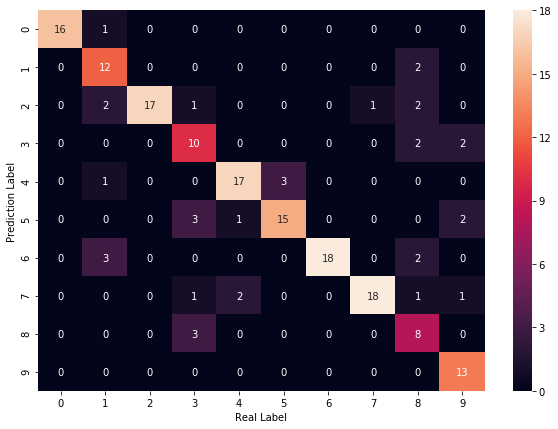

In [13]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [14]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:8 index:[4] real:5
#1 min_error:14 index:[2] real:2
#2 min_error:14 index:[1 8] real:8
#3 min_error:3 index:[0] real:0
#4 min_error:12 index:[1] real:1
#5 min_error:7 index:[7] real:7
#6 min_error:2 index:[6] real:6
#7 min_error:6 index:[3] real:3
#8 min_error:3 index:[2] real:2
#9 min_error:13 index:[2] real:1
#10 min_error:13 index:[2 7] real:7
#11 min_error:16 index:[4 7] real:4
#12 min_error:7 index:[6] real:6
#13 min_error:7 index:[3] real:3
#14 min_error:10 index:[1] real:1
#15 min_error:13 index:[3] real:3
#16 min_error:11 index:[7] real:9
#17 min_error:10 index:[1] real:1
#18 min_error:11 index:[7] real:7
#19 min_error:3 index:[6] real:6
#20 min_error:12 index:[8] real:8
#21 min_error:6 index:[4] real:4
#22 min_error:7 index:[3] real:3
#23 min_error:12 index:[1] real:1
#24 min_error:4 index:[4] real:4
#25 min_error:5 index:[0] real:0
#26 min_error:9 index:[5] real:5
#27 min_error:2 index:[3] real:3
#28 min_error:9 index:[6] real:6
#29 min_error:11 index:[3 9] real:

In [15]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(45):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(45 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.8620902906617193
Avg Base Learner:0.8228818800247371


In [16]:
from random import randint

list_acc = []

for iii in range(45):
    pred_value = []
    error_list = []


    for j in range(1617,1617+180):
        pred = []
        for i in range(iii):
            [pred_outputs, real_outputs] = get_pred_real(i, j)
            #print(pred_outputs, real_outputs)
            pred.append(pred_outputs)
        #print(np.array(pred).T)

        error = []
        for i in range(10):
            error.append(iii - np.sum(number_codes[i][:iii] == np.array(pred).T))
        #print(error)

        pred_value.append(np.where(error==np.min(error)))
        error_list.append(np.min(error))
        #print(np.where(error==np.min(error)) )
    list_P = []
    for i in pred_value:
        if (len(i[0])) == 1:
            list_P.append(i[0][0])
        else:
            random_pick = randint(0, len(i[0])-1)
            list_P.append(i[0][random_pick])
    acc = np.sum(list_P == digits.target[1617:])/180
    print("Accuracy on training set: {}".format(acc))
    list_acc.append(acc)

Accuracy on training set: 0.1111111111111111
Accuracy on training set: 0.06666666666666667
Accuracy on training set: 0.16666666666666666
Accuracy on training set: 0.16666666666666666
Accuracy on training set: 0.2722222222222222
Accuracy on training set: 0.3388888888888889
Accuracy on training set: 0.38333333333333336
Accuracy on training set: 0.4
Accuracy on training set: 0.5166666666666667
Accuracy on training set: 0.5722222222222222
Accuracy on training set: 0.5444444444444444
Accuracy on training set: 0.6222222222222222
Accuracy on training set: 0.6166666666666667
Accuracy on training set: 0.6111111111111112
Accuracy on training set: 0.5888888888888889
Accuracy on training set: 0.6333333333333333
Accuracy on training set: 0.6611111111111111
Accuracy on training set: 0.6611111111111111
Accuracy on training set: 0.6555555555555556
Accuracy on training set: 0.6944444444444444
Accuracy on training set: 0.6222222222222222
Accuracy on training set: 0.6833333333333333
Accuracy on training 

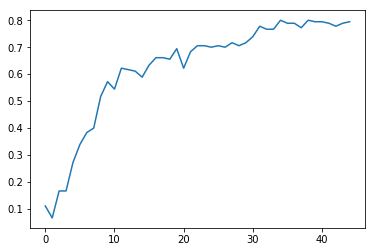

In [17]:
plt.plot(range(45),list_acc)
plt.show()

In [55]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

numbers = [*range(2)]
number_of_classification = len(numbers)

list_nodes_number = []
list_connection_number = []

for winner in winner_list:
    used_nodes = list(winner.nodes.keys())
    # create a dict for mapping 
    l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
    l2 = range(len(l1))
    dict_nodes = dict(zip(l1, l2))

    ### 将节点加入图
    g = Graph(len(l1))# inputs + outputs + used  
    # add connections in the graph
    for cg in winner.connections.values():
        if cg.enabled:
            g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])

    v = numbers
    list_connections = []
    for vi in v:
        for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
            list_connections.append(g.isReachable(u, vi))

    nodes_inputs = range(number_of_classification, number_of_classification+ 64)
    nodes_outputs = range(number_of_classification)
    nodes_mid = range(number_of_classification + 64, len(dict_nodes))

    # 找到所有输入和输出连接的路
    all_path = []
    for u in nodes_inputs:
        for v in nodes_outputs:
            path = findAllPath(g.graph, u, v)
            if path:
                all_path = all_path + path

    # 得到最长路，以及每个节点在哪个层级
    max_length = max([len(x) for x in all_path])
    nodes_tuples_list = []
    for path in all_path:
        #print(path)
        for node in path:
            nodes_tuples_list.append([node, path.index(node)])

    # 确定节点的层级（消除重复）       
    nodes_tuples_fixed_list = []
    for index in range(max_length):
        for nodes in nodes_tuples_list:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                if nodes not in nodes_tuples_fixed_list:
                    nodes_tuples_fixed_list.append(nodes)


    # 所有有连接的节点
    all_used_nodes = []
    for node in nodes_tuples_fixed_list:
        if node[0] not in all_used_nodes:
            all_used_nodes.append(node[0])

    # 确定节点的层级（最终确定）
    nodes_tuples_fixed_list_final = []

    for node in all_used_nodes:
        if node in nodes_inputs:
            nodes_tuples_fixed_list_final.append([node, 0])
        elif node in nodes_outputs:
            nodes_tuples_fixed_list_final.append([node, max_length - 1])
        else:
            list_node = []
            for nodes in nodes_tuples_fixed_list:
                if node == nodes[0]:
                    list_node.append(nodes)
            layer = 0
            for ele in list_node:
                # 删除重复项，取最大
                if ele[1] > layer:
                    layer = ele[1]
            nodes_tuples_fixed_list_final.append([node,layer])


    # 每个层级的节点合数
    length_of_layers = []
    number_of_nodes = 0
    for index in range(max_length):
        for nodes in nodes_tuples_fixed_list_final:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                number_of_nodes += 1
        length_of_layers.append(number_of_nodes)

    length_of_each_layer = []
    length_of_each_layer.append(length_of_layers[0])
    for i in range(1, max_length):
        length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

    # 输出每个层级的节点个数
    #print("length of each layers:", length_of_each_layer)

    # 所有端到端的路
    all_path_side2side = []
    for path in all_path:
        if len(path) == 2:
            all_path_side2side.append(path)
        else:
            for i in range(len(path)-1):
                all_path_side2side.append([path[i],path[i+1]])

    # 定义节点到绘图的字典
    dict_nodes_graph = dict()
    count_number_layer = [0] * max_length
    for nodes in nodes_tuples_fixed_list_final:
        node, layer = nodes
        dict_nodes_graph[node] = [count_number_layer[layer], layer]
        count_number_layer[layer] += 1
    list_nodes_number.append(np.sum(length_of_each_layer))
    list_connection_number.append(len(all_path_side2side))
    print("Number of nodes:{} Number of connections:{}".format(np.sum(length_of_each_layer),len(all_path_side2side)))

Number of nodes:20 Number of connections:22
Number of nodes:22 Number of connections:25
Number of nodes:19 Number of connections:20
Number of nodes:24 Number of connections:38
Number of nodes:18 Number of connections:22
Number of nodes:19 Number of connections:18
Number of nodes:19 Number of connections:23
Number of nodes:17 Number of connections:18
Number of nodes:28 Number of connections:41
Number of nodes:21 Number of connections:25
Number of nodes:26 Number of connections:35
Number of nodes:21 Number of connections:23
Number of nodes:26 Number of connections:32
Number of nodes:25 Number of connections:29
Number of nodes:21 Number of connections:21
Number of nodes:24 Number of connections:34
Number of nodes:22 Number of connections:25
Number of nodes:16 Number of connections:17
Number of nodes:22 Number of connections:31
Number of nodes:19 Number of connections:17
Number of nodes:26 Number of connections:34
Number of nodes:20 Number of connections:19
Number of nodes:23 Number of con

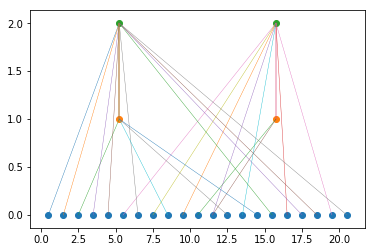

In [50]:
max_nodes_one_layer = np.max(length_of_each_layer)
for path in all_path_side2side:
    node1, node2 = path
    x1, y1 = dict_nodes_graph[node1]
    x2, y2 = dict_nodes_graph[node2]
    
    interval1 = max_nodes_one_layer/length_of_each_layer[y1]
    interval2 = max_nodes_one_layer/length_of_each_layer[y2]
    
    plt.plot([x1*interval1 + interval1/2, x2*interval2 + interval2/2], [y1, y2], linewidth=0.4)

for layer in range(max_length):
    interval = max_nodes_one_layer/length_of_each_layer[layer]
    plt.scatter((interval * np.arange(length_of_each_layer[layer]))+ interval/2, [layer]*length_of_each_layer[layer])

plt.show()

In [51]:
len(list_nodes_number)

45

In [56]:
print("Total nodes:{} Total connections::{}".format(np.sum(list_nodes_number), np.sum(list_connection_number)))

Total nodes:976 Total connections::1186
